# Frequentist fits with likelihood profiling

This example performs a frequentist 1D fit to the CKM element $V_{ub}$ and a 2D fit to $V_{ub}$ and $V_{cb}$, demonstrating the use of the `Profiler1D` and `Profiler2D` classes in the `flavio.statistics.fitters` module.

In [7]:
# flavio imports
from  flavio.statistics.fits import FrequentistFit
from flavio.statistics.fitters.profiler import Profiler1D, Profiler2D

# imports needed for plotting
import matplotlib.pyplot as plt
import flavio.plots as fpl
import warnings
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

List of nuisance parameters and fit observables

In [2]:
nuisance = ['Vus', 'Vcb', 'bag_B0_1', 'bag_Bs_1', 'bag_K0_1',
            'f_B0', 'f_Bs', 'f_K0',
            'eta_tt_K0', 'eta_cc_K0', 'eta_ct_K0', 'kappa_epsilon', 'DeltaM_K0',]
observables = ['DeltaM_s', 'DeltaM_d', 'a_fs_d', 'a_fs_s', 'S_psiphi', 'S_psiK', 'eps_K',]

Note here that `flavio.default_parameters` contains a constraints on `Vcb` that is treated here as a (pseudo-) measurement of a nuisance parameter, and that is essentially equivalent to including $\mathrm{BR}(B\to X_ce\nu)$ among the fit observables (which would however require the inclusion of further nuisance parameters like the charm quark mass).

## 1D fit to $|V_{ub}|$

Defining the fit instance. Note that we remove `Vub` from the nuisance parameters, as it cannot be fit and nuisance parameter at the same time.

In [3]:
fit_Vub = FrequentistFit(
            name=                 'Frequentist SM CKM fit',
            fit_parameters=       ['Vub'],
            nuisance_parameters=  [p for p in nuisance if p not in ['Vub']],
            observables=          observables,)

Defining the 1D likelihood profiler instance with a given range for `Vub`

In [4]:
prof1d = Profiler1D(fit_Vub, 3.4e-3, 4.1e-3)

Do the profiling. In this case 30 steps will be enough for a smooth contour.

In [23]:
warnings.simplefilter("ignore", RuntimeWarning)
%time x, y, n = prof1d.run(steps=30, threads=4)

CPU times: user 1min 5s, sys: 67.4 ms, total: 1min 5s
Wall time: 1min 23s


The `pvalue_prob_plotdata` method computes the $p$-value from the profile likelihood (assuming the applicability of Wilks' theorem) in a form suitable to be fed to the `pvalue_plot` function.

In [11]:
dat = prof1d.pvalue_prob_plotdata()

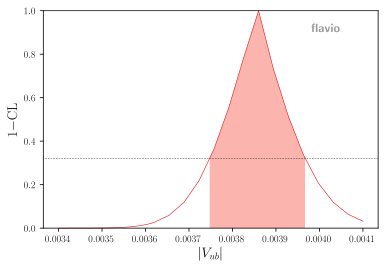

In [12]:
# plot the p value, shading the region with more the 68% confidence
fpl.pvalue_plot(**dat, fill_y=1-0.68)

plt.ylabel(r'$1-$CL')
plt.xlabel(r'$|V_{ub}|$')

# add a dotted line showing the 68% confidence level.
plt.axhline(y=1-0.68, ls=':', c='k', lw=0.6)
fpl.flavio_branding()

## 2D fit to $|V_{ub}|$ and $|V_{cb}|$

Again, we manually remove the fit parameters from the list of nuisance parameters.

In [13]:
fit_Vxb = FrequentistFit(
            name=                 'Frequentist Vub-Vcb fit',
            fit_parameters=       ['Vub', 'Vcb'],
            nuisance_parameters=  [p for p in nuisance if p not in ['Vub', 'Vcb']],
            observables=          observables,)

Now compute the profile likelihood in the ranges given

In [19]:
prof2d = Profiler2D(fit_Vxb, 3.3e-3, 4.4e-3, 4.2e-2, 4.9e-2)

In [20]:
%time x, y, z, n = prof2d.run(steps=(10, 10), threads=4)

CPU times: user 84.5 ms, sys: 24.4 ms, total: 109 ms
Wall time: 1min 5s


Return the log-likelihood in a form suitable for use with the `contour` plot function. Display the $\Delta \ln\mathcal L$ contours corresponding to 1, 2, and 3$\sigma$.

In [21]:
dat = prof2d.contour_plotdata(n_sigma=(1,2,3))

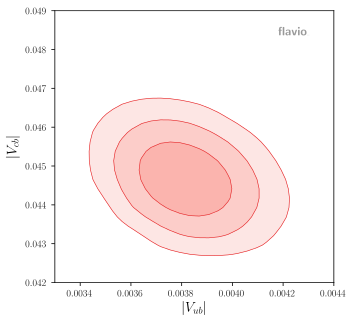

In [22]:
plt.figure(figsize=(5,5))

# use interpolation to get smoother contours
fpl.contour(**dat, interpolation_factor=3)

plt.xlabel(r'$|V_{ub}|$')
plt.ylabel(r'$|V_{cb}|$')

fpl.flavio_branding()